In [13]:
import pandas as pd
import numpy as np

## Importazioni dati

In [14]:
nomeFile = './marziani.csv'
data = pd.read_csv(nomeFile)
data

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,viola,20.0,3.87,14.77,73.22
1,Robby,viola,27.0,3.15,28.19,88.44
2,Robby,viola,25.0,4.35,12.05,76.74
3,Robby,blu,20.0,3.76,9.90,81.37
4,Robby,blu,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,Simmy,viola,29.0,4.55,35.48,68.47
1996,Simmy,blu,23.0,3.84,29.86,71.51
1997,Simmy,viola,22.0,4.55,29.41,68.38
1998,Simmy,rosso,27.0,4.53,33.12,68.10


In [15]:
print('>>Colonne')
print(data.columns)
print('\n>>Tipi')
print(data.dtypes)

>>Colonne
Index(['specie', 'colore', 'n_arti', 'peso', 'altezza', 'larghezza'], dtype='object')

>>Tipi
specie        object
colore        object
n_arti       float64
peso         float64
altezza      float64
larghezza    float64
dtype: object


In [16]:
print('>>Specie')
print(data.specie.unique())
print('\n>>Describe')
print(data["specie"].describe())

>>Specie
['Robby' 'Simmy']

>>Describe
count      2000
unique        2
top       Robby
freq       1000
Name: specie, dtype: object


In [17]:
print('\n>>Describe\n', data["colore"].describe())


>>Describe
 count     1993
unique       3
top        blu
freq       674
Name: colore, dtype: object


In [18]:
maskRobby = data["specie"] == 'Robby'
maskSimmy = data["specie"] == 'Simmy'

print('>>Robby')
print(data[maskRobby].describe())
print('\n>>Simmy')
print(data[maskSimmy].describe())

>>Robby
           n_arti         peso     altezza   larghezza
count  999.000000  1000.000000  996.000000  999.000000
mean    24.637638     3.500900   17.518082   84.719429
std      2.899248     0.489139    4.227621   11.456814
min     20.000000     2.130000    3.170000   44.700000
25%     22.000000     3.170000   14.740000   77.045000
50%     25.000000     3.490000   17.330000   84.890000
75%     27.000000     3.830000   20.307500   92.510000
max     29.000000     5.050000   29.400000  117.450000

>>Simmy
           n_arti         peso     altezza   larghezza
count  995.000000  1000.000000  999.000000  998.000000
mean    24.544724     4.490280   32.769620   70.241653
std      2.883513     0.518585    5.755694    3.345319
min     20.000000     2.850000   15.630000   59.440000
25%     22.000000     4.147500   29.070000   68.000000
50%     25.000000     4.505000   32.640000   70.330000
75%     27.000000     4.850000   36.475000   72.610000
max     29.000000     6.110000   49.750000   80.

## Rendiamo numeriche le lable

In [19]:
colori = np.sort(data["colore"].dropna().unique()) #np.sort per metterli in ordine alfabetico
print(colori)

for i, col in enumerate(colori):
    data['colore'].replace(col, i, inplace=True)

data

['blu' 'rosso' 'viola']


,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,2.0,20.0,3.87,14.77,73.22
1,Robby,2.0,27.0,3.15,28.19,88.44
2,Robby,2.0,25.0,4.35,12.05,76.74
3,Robby,0.0,20.0,3.76,9.90,81.37
4,Robby,0.0,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,Simmy,2.0,29.0,4.55,35.48,68.47
1996,Simmy,0.0,23.0,3.84,29.86,71.51
1997,Simmy,2.0,22.0,4.55,29.41,68.38
1998,Simmy,1.0,27.0,4.53,33.12,68.10


In [20]:
import seaborn as sns

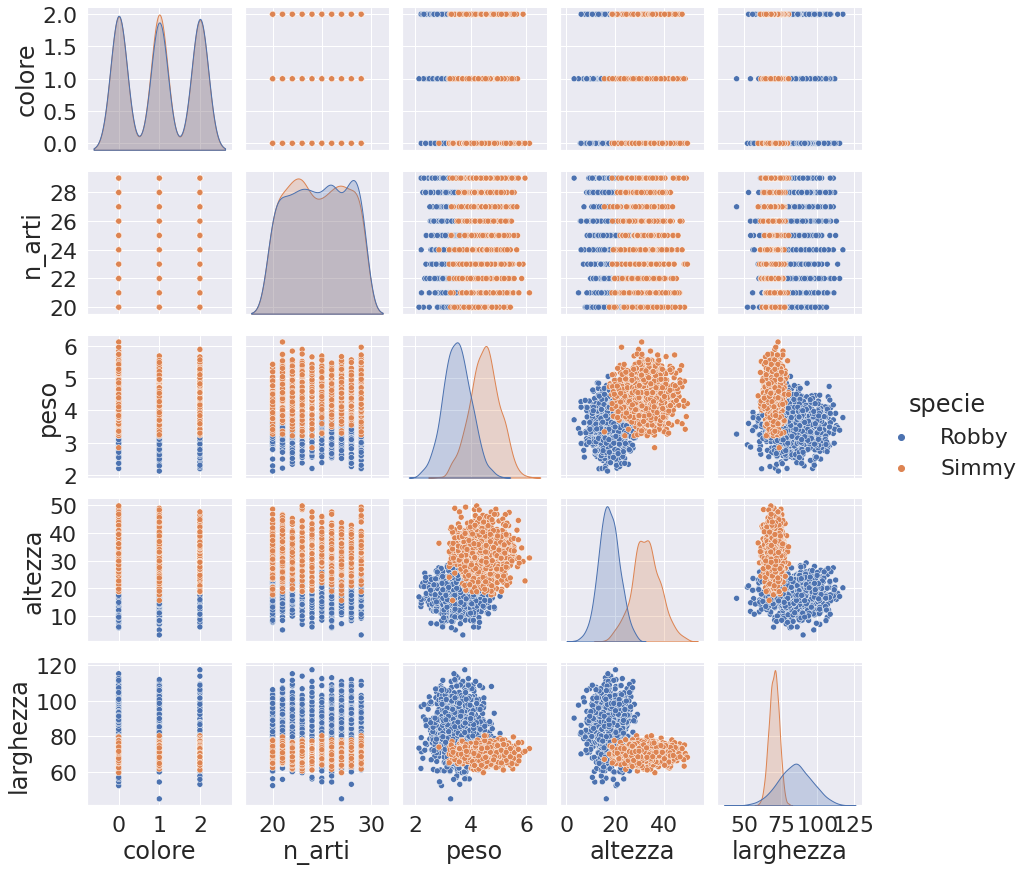

In [21]:
sns.set_theme(font_scale=2)
sns.pairplot(data, hue='specie', dropna=True)
sns.set()

In [23]:
cols_with_missing = [col for col in data.columns if data[col].isnull().sum() > 0]
print(cols_with_missing)

['colore', 'n_arti', 'altezza', 'larghezza']


In [24]:
cols_selected=["peso", "altezza", "larghezza"]
d = data.dropna(axis="index", subset = cols_selected)
print(d.shape)
print([col for col in d.columns if d[col].isnull().sum()])

(1992, 6)
['colore', 'n_arti']


In [25]:
X = d[cols_selected]
y = d["specie"]
print(X.head())
print(y.head())

   peso  altezza  larghezza
0  3.87    14.77      73.22
1  3.15    28.19      88.44
2  4.35    12.05      76.74
3  3.76     9.90      81.37
4  2.86    19.87      84.65
0    Robby
1    Robby
2    Robby
3    Robby
4    Robby
Name: specie, dtype: object


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   train_size=0.7, random_state=0)

print(X_train.head())
print("Numero di campioni in X_train: ",X_train.shape[0])
print(y_train.value_counts())
print(y_train.head())

      peso  altezza  larghezza
1853  4.58    29.13      70.59
486   3.93    25.37      95.30
846   3.95    27.27      73.86
376   3.01    21.95      74.95
580   3.17    12.02      76.47
Numero di campioni in X_train:  1394
Simmy    710
Robby    684
Name: specie, dtype: int64
1853    Simmy
486     Robby
846     Robby
376     Robby
580     Robby
Name: specie, dtype: object


## Standardizzazione

In [30]:
pd.options.display.float_format = '{:.3f}'.format

m = X_train.mean()
print(f">>Media: \n{m}")
s = X_train.std()
print(f">>Deviazione standard: \n{s}")

>>Media: 
peso         3.995
altezza     25.276
larghezza   77.389
dtype: float64
>>Deviazione standard: 
peso         0.708
altezza      9.173
larghezza   10.984
dtype: float64


In [34]:
n_X_train = (X_train-m)/s
print(f">>>Train normalizzato \n {n_X_train.describe()}")

>>>Train normalizzato 
           peso  altezza  larghezza
count 1394.000 1394.000   1394.000
mean     0.000   -0.000     -0.000
std      1.000    1.000      1.000
min     -2.536   -2.410     -2.297
25%     -0.742   -0.863     -0.724
50%     -0.007   -0.117     -0.360
75%      0.755    0.846      0.667
max      2.988    2.572      3.444


In [ ]:
print("Train")
print(y_train.values[:5])
print(model._predict)